In [3]:
import pandas as pd

# Load the dataset
file_path = 'auto-mpg.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## 데이터 전처리

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. 데이터 로드
data = pd.read_csv(file_path)

# 2. 불필요한 열 제거 ('car name')
data = data.drop(columns=['car name'])

# 3. horsepower 열을 숫자형으로 변환하고, 변환할 수 없는 값은 NaN으로 처리
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

# 4. 50% 이상의 결측값이 있는 열 삭제
threshold = len(data) * 0.5
data = data.dropna(thresh=threshold, axis=1)

# 5. 나머지 결측값은 각 열의 평균값으로 채우기
data = data.fillna(data.mean())

# 6. 범주형 변수 인코딩 (예: 'origin' 열 원-핫 인코딩)
data = pd.get_dummies(data, columns=['origin'], prefix='origin')

# 7. 입력(X)과 출력(y) 분리
X = data.drop(columns=['mpg'])
y = data['mpg']

# 8. 훈련 데이터와 테스트 데이터 분할 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 9. 데이터 스케일링 (StandardScaler 사용)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 훈련 데이터, 테스트 데이터 개수 확인
train_size = X_train.shape[0]
test_size = X_test.shape[0]

train_size, test_size

(318, 80)

## 하이퍼파라미터 찾기

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# 1. 기본 모델 초기화
rf_model = RandomForestRegressor(random_state=42)

# 2. 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],          # 트리 개수
    'max_depth': [5, 10, 20, None],          # 트리의 최대 깊이
    'min_samples_split': [3, 4, 5],          # 분기 시 최소 샘플 수
    'min_samples_leaf': [0, 1, 2]             # 리프 노드의 최소 샘플 수
}

# 3. GridSearchCV 설정
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# 4. 하이퍼파라미터 튜닝 수행
grid_search.fit(X_train, y_train)

# 5. 최적의 하이퍼파라미터와 모델 확인
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}


c:\Users\kweon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\kweon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\kweon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\kweon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base

## 학습

In [6]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 최적 하이퍼파라미터를 적용한 Random Forest 모델 생성
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=4,
    min_samples_leaf=1,
    random_state=42
)

# 다른 모델 생성
model = LinearRegression()
gb_model = GradientBoostingRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)

# 모델 학습
model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# 모델 예측
y_pred = model.predict(X_test)
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# 평가 함수 정의
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, r2

# 각 모델 평가
rf_mse, rf_mae, rf_r2 = evaluate_model(y_test, rf_pred)
gb_mse, gb_mae, gb_r2 = evaluate_model(y_test, gb_pred)
xgb_mse, xgb_mae, xgb_r2 = evaluate_model(y_test, xgb_pred)
mse, mae, r2 = evaluate_model(y_test, y_pred)

# 결과 출력
print("Linear Regression:")
print(f'    Mean Squared Error (MSE): {mse:.2f}')
print(f'    Mean Absolute Error (MAE): {mae:.2f}')
print(f'    R-squared (R2): {r2:.2f}\n')

print("Random Forest (with Best Hyperparameters):")
print(f"  Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"  Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"  R-squared (R2): {rf_r2:.2f}\n")

print("Gradient Boosting:")
print(f"  Mean Squared Error (MSE): {gb_mse:.2f}")
print(f"  Mean Absolute Error (MAE): {gb_mae:.2f}")
print(f"  R-squared (R2): {gb_r2:.2f}\n")

print("XGBoost:")
print(f"  Mean Squared Error (MSE): {xgb_mse:.2f}")
print(f"  Mean Absolute Error (MAE): {xgb_mae:.2f}")
print(f"  R-squared (R2): {xgb_r2:.2f}")


Linear Regression:
    Mean Squared Error (MSE): 8.34
    Mean Absolute Error (MAE): 2.29
    R-squared (R2): 0.84

Random Forest (with Best Hyperparameters):
  Mean Squared Error (MSE): 4.70
  Mean Absolute Error (MAE): 1.59
  R-squared (R2): 0.91

Gradient Boosting:
  Mean Squared Error (MSE): 5.69
  Mean Absolute Error (MAE): 1.77
  R-squared (R2): 0.89

XGBoost:
  Mean Squared Error (MSE): 7.60
  Mean Absolute Error (MAE): 1.99
  R-squared (R2): 0.86


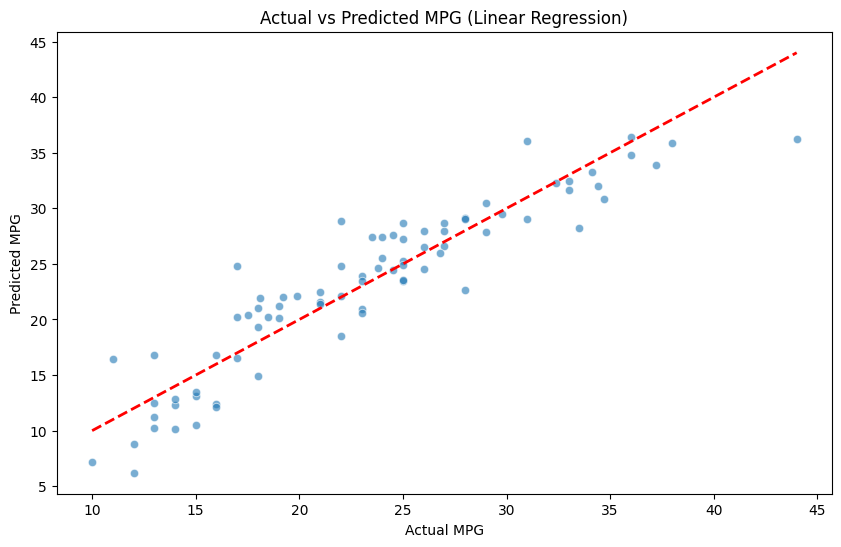

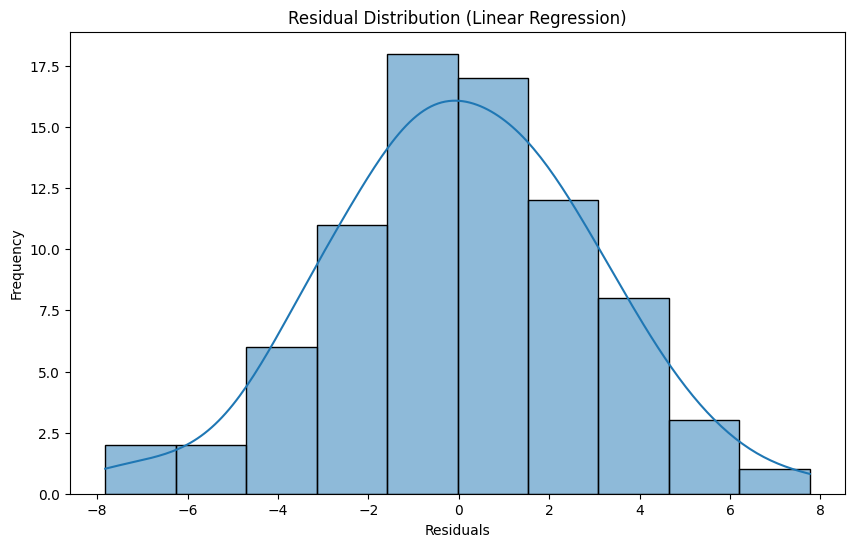

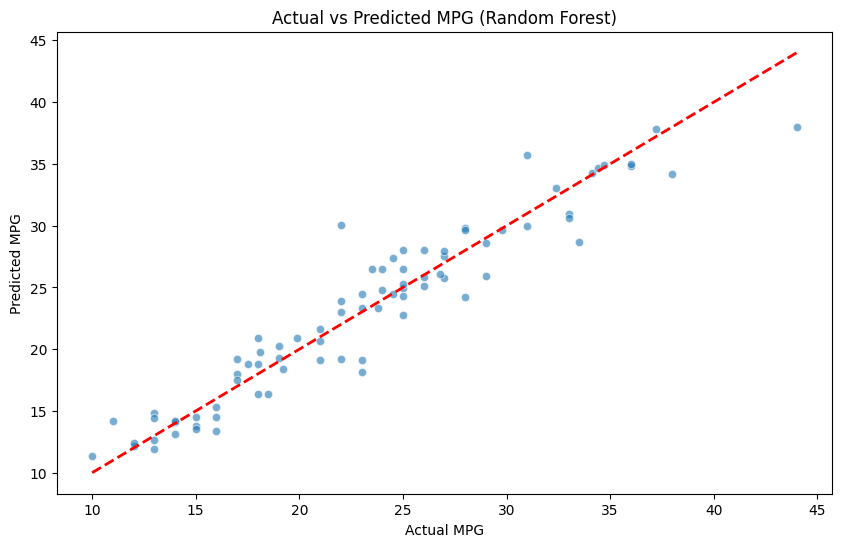

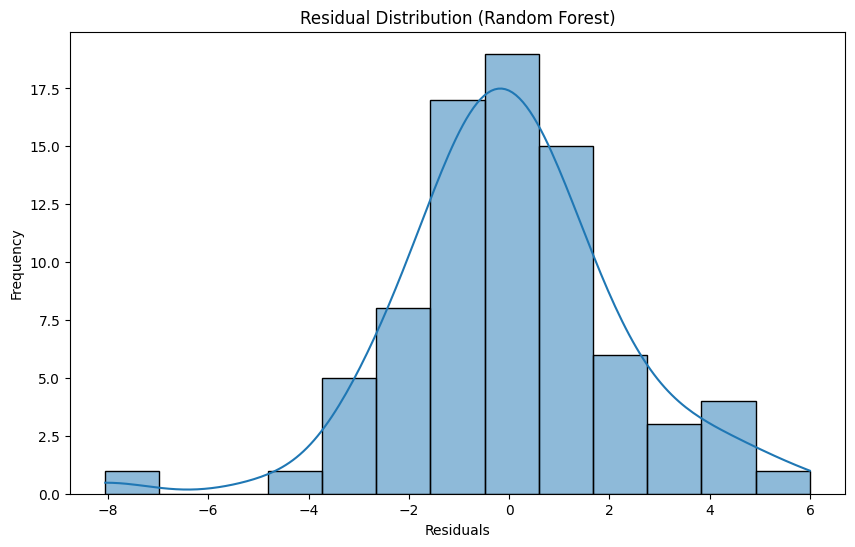

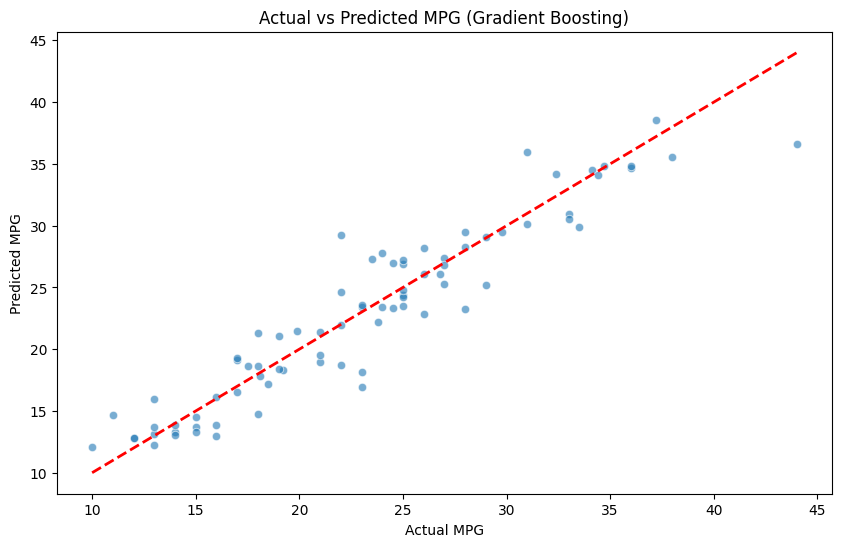

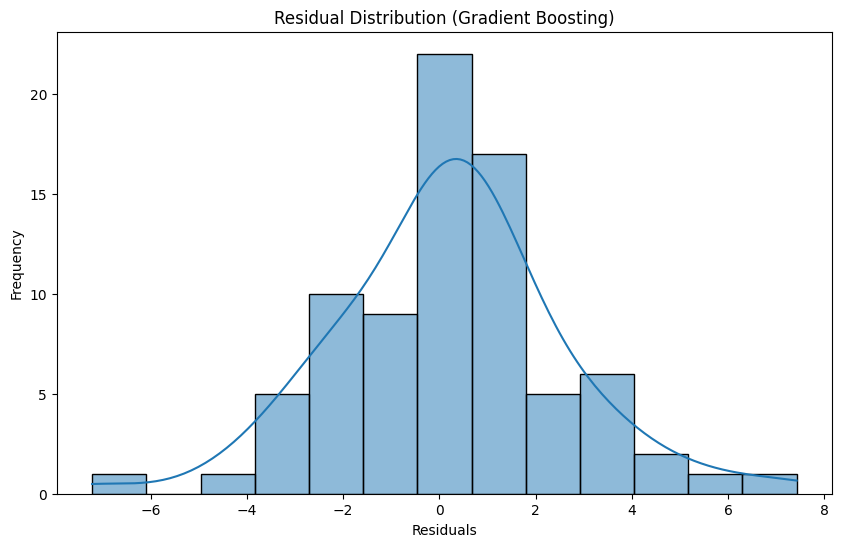

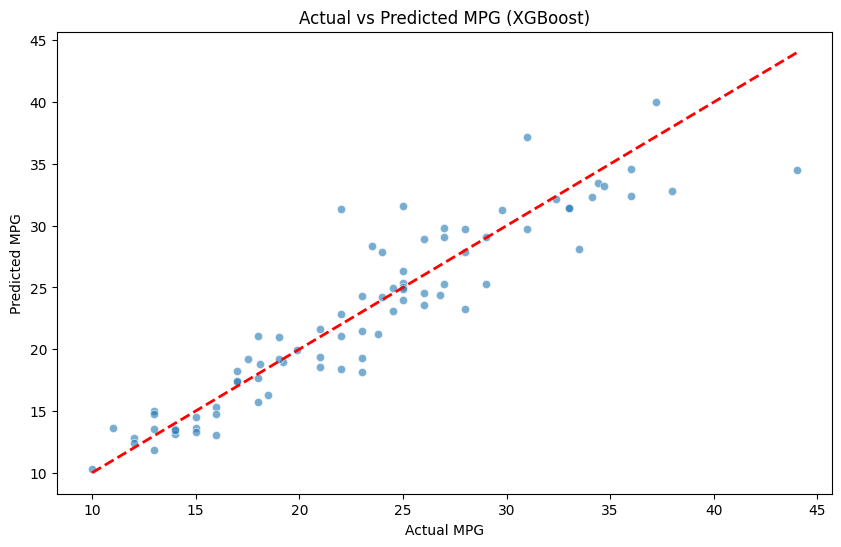

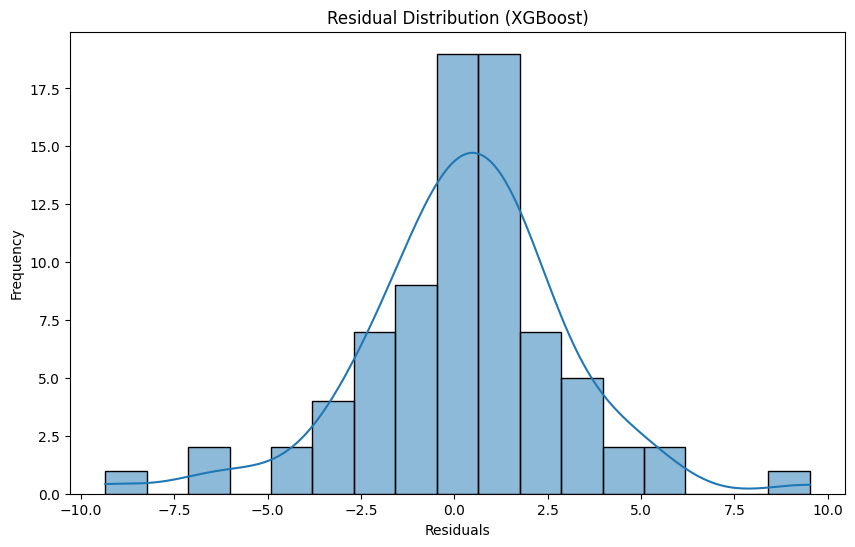

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 각 모델의 실제 값 vs 예측 값 산점도와 잔차 분포도 함수
def plot_evaluation(y_test, y_pred, model_name):
    # 1. 실제 값 vs 예측 값 산점도
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='w', linewidth=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual MPG')
    plt.ylabel('Predicted MPG')
    plt.title(f'Actual vs Predicted MPG ({model_name})')
    plt.show()

    # 2. 잔차 분포도
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title(f'Residual Distribution ({model_name})')
    plt.show()

# 각 모델에 대해 평가 그래프 출력
plot_evaluation(y_test, y_pred, "Linear Regression")
plot_evaluation(y_test, rf_pred, "Random Forest")
plot_evaluation(y_test, gb_pred, "Gradient Boosting")
plot_evaluation(y_test, xgb_pred, "XGBoost")


## 랜덤 테스트 데이터 셋의 연비 예측 결과

In [ ]:
import random
import pandas as pd

# 데이터셋 로드
file_path = 'auto-mpg.csv'
data = pd.read_csv(file_path)

# 데이터 전처리 (이전에 설명한 단계 적용)
data = data.drop(columns=['car name'])  # 불필요한 열 제거
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')  # horsepower 열을 숫자형으로 변환, 변환 불가능한 값은 NaN으로 처리
data = data.dropna(thresh=len(data) * 0.5, axis=1)  # 50% 이상의 결측값이 있는 열 제거
data = data.fillna(data.mean())  # 남은 결측값은 각 열의 평균값으로 채움
data = pd.get_dummies(data, columns=['origin'], prefix='origin')  # 범주형 변수 origin을 원-핫 인코딩

# 입력 변수(X)와 출력 변수(y) 분리
X = data.drop(columns=['mpg'])
y = data['mpg']

# 훈련 데이터와 테스트 데이터로 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # 훈련 데이터 스케일링
X_test_scaled = scaler.transform(X_test)  # 테스트 데이터 스케일링

# 최적의 파라미터로 RandomForestRegressor 모델 불러오기 (이전에 튜닝한 결과 사용)
from sklearn.ensemble import RandomForestRegressor
best_rf_model = RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=42)
best_rf_model.fit(X_train_scaled, y_train)

# 테스트 셋에서 무작위로 하나의 샘플 선택
random_index = random.randint(0, len(X_test_scaled) - 1)
random_test_instance = X_test_scaled[random_index].reshape(1, -1)
random_test_features = X_test.iloc[random_index]

# 선택된 샘플에 대해 연비(MPG) 값 예측
predicted_mpg = best_rf_model.predict(random_test_instance)[0]
actual_mpg = y_test.iloc[random_index]

# 결과 출력
random_test_features, predicted_mpg, actual_mpg


(cylinders           6
 displacement    181.0
 horsepower      110.0
 weight           2945
 acceleration     16.4
 model year         82
 origin_1         True
 origin_2        False
 origin_3        False
 Name: 386, dtype: object,
 26.173124440836936,
 25.0)